In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("h_w.csv")
df.sample(5)
# Height(inches)

,gender,height
7718,Female,69.125275
582,Male,69.770151
6975,Female,65.344310
1019,Male,66.029708
4954,Male,71.531179


### Outlier Detection and removal with standerd deviation

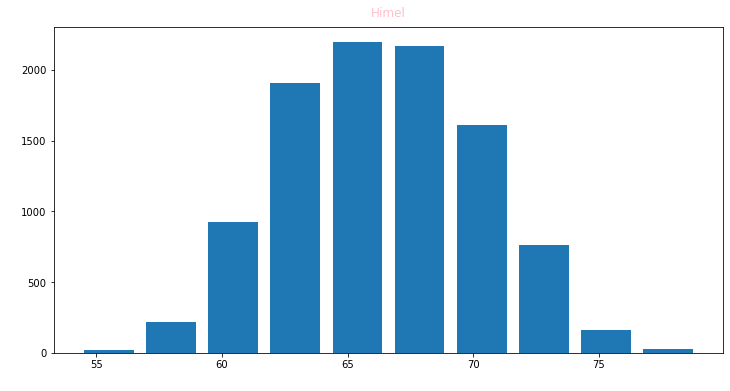

In [38]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
plt.hist(df.height,rwidth = 0.8)
plt.title("Himel",pad = 10,color = "Pink")
plt.xlabel("Height(inches)", color = 'White')
plt.ylabel("Count", color = 'White')
#plt.figure(figsize = (10,6))
plt.show()

In [27]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


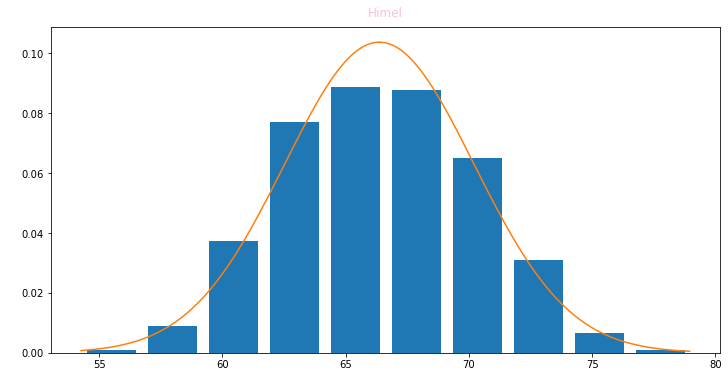

In [43]:
from scipy.stats import norm
import statistics
plt.hist(df.height,rwidth = 0.8, density = True)
plt.title("Himel",pad = 10,color = "Pink")
plt.xlabel("Height(inches)", color = 'White')
plt.ylabel("Count", color = 'White')

# Another formate:
#mean = statistics.mean(df.height)
#std = statistics.stdev(df.height)
#h1 = np.linspace(df.height.min(), df.height.max(), 100)
#plt.plot(h1, norm.pdf(h1, mean, std))


h1 = np.arange(df.height.min(), df.height.max(),0.1)
plt.plot(h1, norm.pdf(h1,df.height.mean(), df.height.std()))

In [45]:
df.height.mean()

66.3675597548656

In [46]:
df.height.std()

3.847528120795573

In [48]:
upper = df.height.mean() + 3 * (df.height.std())

In [49]:
lower = df.height.mean() - 3 * (df.height.std())

In [51]:
df[(df.height > upper) | (df.height < lower)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [53]:
df1 = df[(df.height <= upper) & (df.height >= lower)]
df1.sample(5)

,gender,height
3897,Male,71.638821
2527,Male,60.269108
8812,Female,65.600373
5701,Female,66.837230
6695,Female,63.060735


In [54]:
df.shape[0] - df1.shape[0]

7

### Outlier Detection and removal with z score

In [55]:
df["Zscore"] = (df.height - df.height.mean()) / df.height.std()
df.head()

,gender,height,Zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [56]:
df[df.Zscore > 3]

,gender,height,Zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [57]:
df[df.Zscore < -3]

,gender,height,Zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


## Exercise 

In [58]:
hr = pd.read_csv("bhp.csv")
hr.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


## Removing outlier using percentile technique

### (1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [68]:
hr.shape

(13200, 7)

In [59]:
hr.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [61]:
max_threshold = hr.price_per_sqft.quantile(0.999)
max_threshold

50959.36200000098

In [62]:
min_threshold = hr.price_per_sqft.quantile(0.001)
min_threshold

1366.184

In [63]:
hr[hr.price_per_sqft >= max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [64]:
hr[hr.price_per_sqft <= min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [65]:
hr1 = hr[(hr.price_per_sqft >= min_threshold) & (hr.price_per_sqft <= max_threshold)]
hr1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [67]:
hr1.shape

(13172, 7)

In [111]:
hr.shape[0] - hr1.shape[0]

28

### (2) Plot histogram for new dataframe that is generated also plot bell curve on same histogram

In [72]:
hr1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


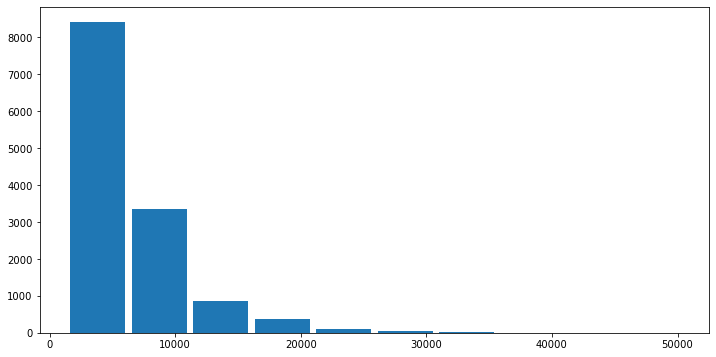

In [71]:
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (12,6)
plt.hist(hr1.price_per_sqft, rwidth = 0.9)
plt.show()

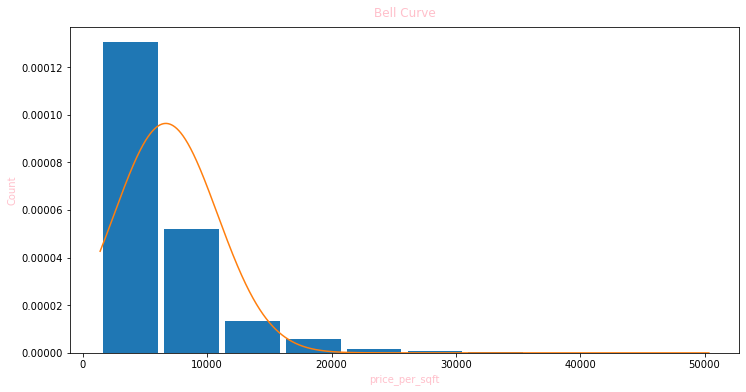

In [93]:
from scipy.stats import norm
plt.hist(hr1.price_per_sqft, rwidth = 0.9, density = True)
plt.title("Bell Curve", pad = 10, color="Pink")
plt.xlabel("price_per_sqft", color="Pink")
plt.ylabel("Count", color="Pink")
#plt.yscale('log')
r = np.arange(hr1.price_per_sqft.min(), hr1.price_per_sqft.max())
plt.plot(r,norm.pdf(r,hr1.price_per_sqft.mean(),hr1.price_per_sqft.std()))

In [79]:
hr1.price_per_sqft.mean()

6663.6537351958705

In [80]:
hr1.price_per_sqft.std()

4141.020700174605

### (3) Use 4 standard deviation to remove outliers

In [81]:
upper1 = hr1.price_per_sqft.mean() + (4 * hr1.price_per_sqft.std())
upper1

23227.73653589429

In [84]:
lower1 = hr1.price_per_sqft.mean() - 4 * (hr1.price_per_sqft.std())
lower1

-9900.429065502549

In [87]:
hr1[(hr1.price_per_sqft <= lower1) | (hr1.price_per_sqft > upper1)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [88]:
hr2 = hr1[(hr1.price_per_sqft >= lower1) & (hr1.price_per_sqft <= upper1)]
hr2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [90]:
hr2.shape

(13047, 7)

In [91]:
hr1.shape[0] - hr2.shape[0]

125

Text(0, 0.5, 'Count')

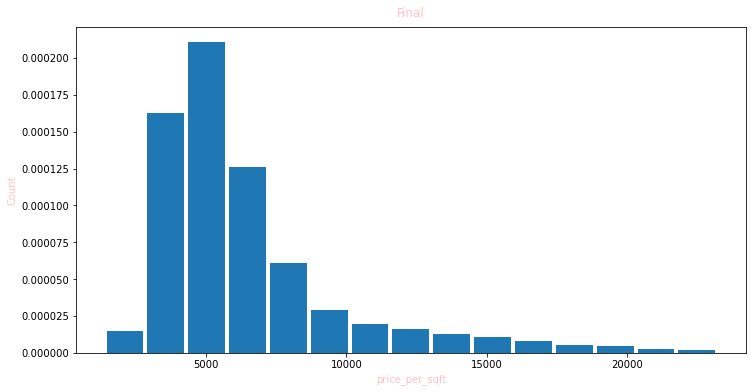

In [98]:
plt.hist(hr2.price_per_sqft, rwidth = 0.9, density = True,bins = 15)
plt.title("Final", pad = 10, color="Pink")
plt.xlabel("price_per_sqft", color="Pink")
plt.ylabel("Count", color="Pink")

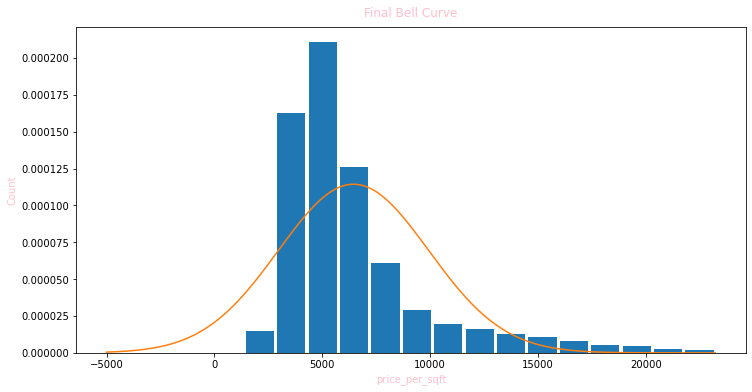

In [102]:
from scipy.stats import norm
plt.hist(hr2.price_per_sqft, rwidth = 0.9, density = True,bins = 15)
plt.title("Final Bell Curve", pad = 10, color="Pink")
plt.xlabel("price_per_sqft", color="Pink")
plt.ylabel("Count", color="Pink")

r1 = np.arange(-5000, hr2.price_per_sqft.max())
plt.plot(r1,norm.pdf(r1,hr2.price_per_sqft.mean(),hr2.price_per_sqft.std()))

### (4) Use zscore of 4 to remove outliers

In [106]:
hr1['Zscore'] = (hr1.price_per_sqft - hr1.price_per_sqft.mean()) / hr1.price_per_sqft.std()
hr1.head()

C:\Users\Himel\AppData\Local\Temp\ipykernel_4600\3474920850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr1['Zscore'] = (hr1.price_per_sqft - hr1.price_per_sqft.mean()) / hr1.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [107]:
hr1[hr1.Zscore > 4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [108]:
hr1[hr1.Zscore < -4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore


In [109]:
hr3 = hr1[(hr1.Zscore > -4) & ((hr1.Zscore <= 4))]
hr3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [110]:
hr1.shape[0] - hr3.shape[0]

125

### (5) (4) Use IQR to remove outliers

In [112]:
hr1.describe()

,total_sqft,bath,price,bhk,price_per_sqft,Zscore
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000,1.317200e+04
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735,-9.952561e-17
std,967.123711,1.337026,145.372047,1.291130,4141.020700,1.000000e+00
min,250.000000,1.000000,8.000000,1.000000,1379.000000,-1.276172e+00
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000,-5.777932e-01
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000,-2.959787e-01
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000,1.563253e-01
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000,1.054942e+01


In [113]:
q1 = hr1.price_per_sqft.quantile(0.25)
q3 = hr1.price_per_sqft.quantile(0.75)
q1,q3

(4271.0, 7311.0)

In [114]:
iqr = q3 - q1
iqr

3040.0

In [115]:
lower2 = q1 - 1.5*iqr
upper2 = q3 + 1.5*iqr
lower2,upper2

(-289.0, 11871.0)

In [116]:
hr1[(hr1.price_per_sqft < lower2) | (hr1.price_per_sqft > upper2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181,2.781282
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571,1.668030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250,2.314972
...,...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228,2.309659
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571,2.151003
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
